In [2]:
import os
os.listdir()

['.ipynb_checkpoints', 'Income.csv', 'K_Mean.ipynb', 'Practice.ipynb']

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [19]:
df = pd.read_csv('Income.csv')
df.rename(columns = {'Income($)' : 'Income'} , inplace = True)
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


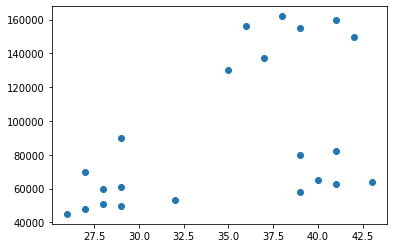

In [27]:
plt.scatter(df.Age, df.Income )

In [36]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


Text(0, 0.5, 'Sum of Squared Error')

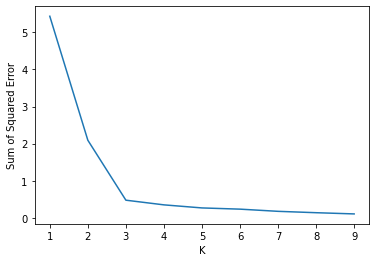

In [38]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

In [48]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age', 'Income']])
df['Cluster'] = y_predict
df

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


Text(0, 0.5, 'Income')

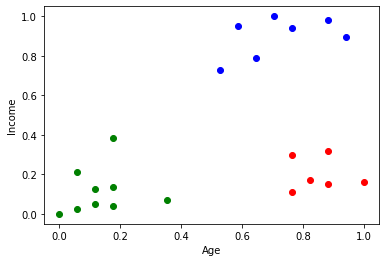

In [49]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

plt.scatter(df1['Age'] , df1['Income'] , color = 'green')
plt.scatter(df2['Age'] , df2['Income'] , color = 'blue')
plt.scatter(df3['Age'] , df3['Income'] , color = 'red')
plt.scatter(km.cluster_centers_(:,0) , )

plt.xlabel('Age')
plt.ylabel('Income')